In [4]:
import pandas as pd
import numpy as np
import datetime
df_fallecido_SINADEF = pd.read_csv('/content/fallecidos_sinadef.csv', delimiter='|')

In [5]:
df_fallecido_SINADEF.rename(columns={'DEPARTAMENTO DOMICILIO':'DEPARTAMENTO','PROVINCIA DOMICILIO':'PROVINCIA','DISTRITO DOMICILIO':'DISTRITO'},inplace=True)

In [ ]:
#df_fallecido_SINADEF.head()

In [ ]:
#df_fallecido_SINADEF.describe()

In [6]:
# Se decide eliminar las filas nulas de EDAD, PAIS DOMICILIO, DEPARTAMENTO, PROVINCIA, DISTRITO E INSTITUCION por representar un % bajo del total del dataset
df_fallecido_SINADEF.dropna(subset=['EDAD','PAIS DOMICILIO','DEPARTAMENTO','PROVINCIA','DISTRITO','INSTITUCION'], inplace=True)
# Para el campo Muerte Violenta se imputa NO SE CONOCE a los campos NULOS y VACIOS.
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['MUERTE VIOLENTA'].isnull(), 'MUERTE VIOLENTA'] = 'NO SE CONOCE' 
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['MUERTE VIOLENTA']==' ', 'MUERTE VIOLENTA'] = 'NO SE CONOCE'
# Para los campos de "Debido a" se imputa SIN REGISTRO a los campos NULOS
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['DEBIDO A (CAUSA A)'].isnull(), 'DEBIDO A (CAUSA A)'] = 'SIN REGISTRO' 
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['DEBIDO A (CAUSA B)'].isnull(), 'DEBIDO A (CAUSA B)'] = 'SIN REGISTRO' 
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['DEBIDO A (CAUSA C)'].isnull(), 'DEBIDO A (CAUSA C)'] = 'SIN REGISTRO' 
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['DEBIDO A (CAUSA D)'].isnull(), 'DEBIDO A (CAUSA D)'] = 'SIN REGISTRO' 
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['DEBIDO A (CAUSA E)'].isnull(), 'DEBIDO A (CAUSA E)'] = 'SIN REGISTRO'
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['DEBIDO A (CAUSA F)'].isnull(), 'DEBIDO A (CAUSA F)'] = 'SIN REGISTRO'
# Se dropean las columnas "Causas" y UBIGEO por contener codigos que no aportan al analisis.
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['CAUSA A (CIE-X)'])
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['CAUSA B (CIE-X)'])
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['CAUSA C (CIE-X)'])
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['CAUSA D (CIE-X)'])
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['CAUSA E (CIE-X)'])
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['CAUSA F (CIE-X)'])
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['COD# UBIGEO DOMICILIO'])
#Mas del 90% de los registros corresponden a Peruanos, se eliminan los datos de extranjeros
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['PAIS DOMICILIO']!='PERU'].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
#Drop de la variable PAIS DOMICILIO porque ya contiene un único valor de PERU
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['PAIS DOMICILIO'])
#Drop del 1% de los registros que no indican Masculino o Femenino en la variable SEXO
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['SEXO'].isin(['INDETERMINADO','SIN REGISTRO'])].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
#Drop del 1% de los registros que no indica SIN REGISTRO en EDAD
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['EDAD']=='SIN REGISTRO'].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
#Mas del 90% de los registros corresponden a edades registradas en Años, se eliminan los datos en dias, horas, minutos, etc.
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['TIEMPO EDAD']!='AÑOS'].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
#Drop de la variable TIEMPO EDAD porque ya contiene un único valor de AÑOS
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns = ['TIEMPO EDAD'])
# Para el campo ESTADO CIVIL se imputa SIN REGISTRO a los campos VACIOS.
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['ESTADO CIVIL']==' ', 'ESTADO CIVIL'] = 'SIN REGISTRO'
# Drop del 1% de ESTADO CIVIL en SIN REGISTRO o IGNORADO
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['ESTADO CIVIL'].isin(['SIN REGISTRO','IGNORADO'])].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
# Drop del 1% de NIVEL DE INSTRUCCIÓN en SIN REGISTRO
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['NIVEL DE INSTRUCCIÓN']=='SIN REGISTRO'].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
# Drop del 1% de DEPARTAMENTO en SIN REGISTRO o VACIO
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['DEPARTAMENTO'].isin(['     ','SIN REGISTRO'])].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
# Drop del 1% de PROVINCIA en VACIO
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['PROVINCIA']==' '].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
# Drop del 1% de DISTRITO en SIN REGISTRO o VACIO
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['DISTRITO'].isin([' ','SIN REGISTRO'])].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
# Drop del 1% de TIPO LUGAR en SIN REGISTRO o IGNORADO
indices_eliminar = df_fallecido_SINADEF.loc[df_fallecido_SINADEF['TIPO LUGAR'].isin(['IGNORADO','SIN REGISTRO'])].index.values
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(indices_eliminar)
# Para el campo INSTITUCION se imputa SIN REGISTRO a los campos VACIOS.
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['INSTITUCION']==' ', 'INSTITUCION'] = 'SIN REGISTRO'

In [7]:
df_fallecido_SINADEF['SEXO'].replace(to_replace='MASCULINO',value='M', inplace = True)
df_fallecido_SINADEF['SEXO'].replace(to_replace='FEMENINO',value='F', inplace = True)
df_fallecido_SINADEF['EDAD']= df_fallecido_SINADEF['EDAD'].astype(int)
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['ESTADO CIVIL']=='CONVIVIENT/CONCUBINA', 'ESTADO CIVIL'] = 'CONVIVIENTE'
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['NIVEL DE INSTRUCCIÓN']=='INICIAL / PRE-ESCOLAR', 'NIVEL DE INSTRUCCIÓN'] = 'PRE-ESCOLAR'
df_fallecido_SINADEF.loc[df_fallecido_SINADEF['NIVEL DE INSTRUCCIÓN']=='NINGUN NIVEL / ILETRADO', 'NIVEL DE INSTRUCCIÓN'] = 'ANALFABETO'
df_fallecido_SINADEF['DEPARTAMENTO']= df_fallecido_SINADEF['DEPARTAMENTO'].str.lower()
df_fallecido_SINADEF['PROVINCIA']= df_fallecido_SINADEF['PROVINCIA'].str.lower()
df_fallecido_SINADEF['DISTRITO']= df_fallecido_SINADEF['DISTRITO'].str.lower()
df_fallecido_SINADEF['FECHA']=pd.to_datetime(df_fallecido_SINADEF['FECHA'])
df_fallecido_SINADEF['DIA'] = df_fallecido_SINADEF['FECHA'].dt.day
df_fallecido_SINADEF = df_fallecido_SINADEF.drop(columns= ['FECHA'])

In [8]:
df_fallecido_SINADEF.info()
df_fallecido_SINADEF.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124930 entries, 0 to 133367
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Nº                    124930 non-null  int64 
 1   TIPO SEGURO           124930 non-null  object
 2   SEXO                  124930 non-null  object
 3   EDAD                  124930 non-null  int64 
 4   ESTADO CIVIL          124930 non-null  object
 5   NIVEL DE INSTRUCCIÓN  124930 non-null  object
 6   DEPARTAMENTO          124930 non-null  object
 7   PROVINCIA             124930 non-null  object
 8   DISTRITO              124930 non-null  object
 9   AÑO                   124930 non-null  int64 
 10  MES                   124930 non-null  int64 
 11  TIPO LUGAR            124930 non-null  object
 12  INSTITUCION           124930 non-null  object
 13  MUERTE VIOLENTA       124930 non-null  object
 14  NECROPSIA             124930 non-null  object
 15  DEBIDO A (CAUSA A

Nº                      0
TIPO SEGURO             0
SEXO                    0
EDAD                    0
ESTADO CIVIL            0
NIVEL DE INSTRUCCIÓN    0
DEPARTAMENTO            0
PROVINCIA               0
DISTRITO                0
AÑO                     0
MES                     0
TIPO LUGAR              0
INSTITUCION             0
MUERTE VIOLENTA         0
NECROPSIA               0
DEBIDO A (CAUSA A)      0
DEBIDO A (CAUSA B)      0
DEBIDO A (CAUSA C)      0
DEBIDO A (CAUSA D)      0
DEBIDO A (CAUSA E)      0
DEBIDO A (CAUSA F)      0
DIA                     0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

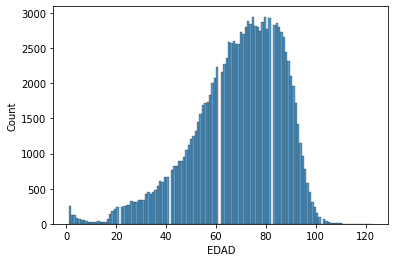

In [10]:
sns.histplot(data=df_fallecido_SINADEF, x="EDAD")